In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import datetime 
import pandas as pd
import netCDF4
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.ticker import FormatStrFormatter

In [2]:
data_gftt_6_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_gftt_6_150_no_loop.csv", delimiter = ",", header=None)
data_gftt_7_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_gftt_7_150_no_loop.csv", delimiter = ",", header=None)
data_gftt_0_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_gftt_0_150_no_loop.csv", delimiter = ",", header=None)
data_gftt_6_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_gftt_6_400_no_loop.csv", delimiter = ",", header=None)
data_gftt_7_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_gftt_7_400_no_loop.csv", delimiter = ",", header=None)
data_gftt_0_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_gftt_0_400_no_loop.csv", delimiter = ",", header=None)

data_orb_6_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_orb_6_150_no_loop.csv", delimiter = ",", header=None)
data_orb_7_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_orb_7_150_no_loop.csv", delimiter = ",", header=None)
data_orb_0_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_orb_0_150_no_loop.csv", delimiter = ",", header=None)
data_orb_6_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_orb_6_400_no_loop.csv", delimiter = ",", header=None)
data_orb_7_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_orb_7_400_no_loop.csv", delimiter = ",", header=None)
data_orb_0_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_orb_0_400_no_loop.csv", delimiter = ",", header=None)

data_sift_6_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_sift_6_150_no_loop.csv", delimiter = ",", header=None)
data_sift_7_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_sift_7_150_no_loop.csv", delimiter = ",", header=None)
# data_sift_0_150 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_sift_0_150_no_loop.csv", delimiter = ",", header=None)
data_sift_6_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_sift_6_400_no_loop.csv", delimiter = ",", header=None)
data_sift_7_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_sift_7_400_no_loop.csv", delimiter = ",", header=None)
data_sift_0_400 = pd.read_csv("~/dev/projects_cpp/VisualSlam/results/results_stereo_sift_0_400_no_loop.csv", delimiter = ",", header=None)

# get gt poses in flattened version
ground_truth_6 = pd.read_csv('../KITTY_dataset/ground_truth_poses/06.txt', delimiter=' ', header=None)
ground_truth_7 = pd.read_csv('../KITTY_dataset/ground_truth_poses/07.txt', delimiter=' ', header=None)
ground_truth_0 = pd.read_csv('../KITTY_dataset/ground_truth_poses/00.txt', delimiter=' ', header=None)


In [3]:
data_gftt_6_150.columns = ['Var', 'Value']
data_gftt_7_150.columns = ['Var', 'Value']
data_gftt_0_150.columns = ['Var', 'Value']
data_gftt_6_400.columns = ['Var', 'Value']
data_gftt_7_400.columns = ['Var', 'Value']
data_gftt_0_400.columns = ['Var', 'Value']

data_orb_6_150.columns = ['Var', 'Value']
data_orb_7_150.columns = ['Var', 'Value']
data_orb_0_150.columns = ['Var', 'Value']
data_orb_6_400.columns = ['Var', 'Value']
data_orb_7_400.columns = ['Var', 'Value']
data_orb_0_400.columns = ['Var', 'Value']

data_sift_6_150.columns = ['Var', 'Value']
data_sift_7_150.columns = ['Var', 'Value']
# data_sift_0_150.columns = ['Var', 'Value']
data_sift_6_400.columns = ['Var', 'Value']
data_sift_7_400.columns = ['Var', 'Value']
data_sift_0_400.columns = ['Var', 'Value']

ground_truth_poses_6 = np.zeros((len(ground_truth_6),3,4)) # transformation matrixies in 3x4 version
ground_truth_poses_7 = np.zeros((len(ground_truth_7),3,4)) # transformation matrixies in 3x4 version
ground_truth_poses_0 = np.zeros((len(ground_truth_0),3,4)) # transformation matrixies in 3x4 version

for npose in range(len(ground_truth_6)): 
    ground_truth_poses_6[npose] = (np.array(ground_truth_6.iloc[npose]).reshape((3,4)))

for npose in range(len(ground_truth_7)): 
    ground_truth_poses_7[npose] = (np.array(ground_truth_7.iloc[npose]).reshape((3,4)))
for npose in range(len(ground_truth_0)): 
    ground_truth_poses_0[npose] = (np.array(ground_truth_0.iloc[npose]).reshape((3,4)))


In [7]:

mean_data_gftt_6_150 = data_gftt_6_150.groupby('Var').mean()
mean_data_gftt_7_150 = data_gftt_7_150.groupby('Var').mean()
mean_data_gftt_0_150 = data_gftt_0_150.groupby('Var').mean()
mean_data_gftt_6_400 = data_gftt_6_400.groupby('Var').mean()
mean_data_gftt_7_400 = data_gftt_7_400.groupby('Var').mean()
mean_data_gftt_0_400 = data_gftt_0_400.groupby('Var').mean()
mean_data_orb_6_150 = data_orb_6_150.groupby('Var').mean() 
mean_data_orb_7_150 = data_orb_7_150.groupby('Var').mean() 
mean_data_orb_0_150 = data_orb_0_150.groupby('Var').mean() 
mean_data_orb_6_400 = data_orb_6_400.groupby('Var').mean() 
mean_data_orb_7_400 = data_orb_7_400.groupby('Var').mean() 
mean_data_orb_0_400 = data_orb_0_400.groupby('Var').mean() 
mean_data_sift_6_150 = data_sift_6_150.groupby('Var').mean() 
mean_data_sift_7_150 = data_sift_7_150.groupby('Var').mean() 
# mean_data_sift_0_150 = data_sift_0_150.groupby('Var').mean() 
mean_data_sift_6_400 = data_sift_6_400.groupby('Var').mean() 
mean_data_sift_7_400 = data_sift_7_400.groupby('Var').mean() 
mean_data_sift_0_400 = data_sift_0_400.groupby('Var').mean() 
mean_data_sift_0_400.head(50)

,Value
Var,
Detector type,2.000000
Loop closing?,0.000000
Number of detected features,400.000000
Tracking type,0.000000
max error x:,30.126680
max error y:,78.394190
max loop time:,91.800000
mean error x:,15.757020
mean error y:,9.113312


In [5]:

sekwencja = ("Detektor GFTT", "Detektor ORB", "Detektor SIFT")
mean_times = {
    '150 punktów': (mean_data_gftt_6_150.loc['mean loop time:','Value'], 
                    mean_data_orb_6_150.loc['mean loop time:', 'Value'], 
                    mean_data_sift_6_150.loc['mean loop time:','Value'] ),
                    
    '400 punktów': (mean_data_gftt_6_400.loc['mean loop time:', 'Value'],
                    mean_data_orb_6_400.loc['mean loop time:', 'Value'], 
                    mean_data_sift_6_400.loc['mean loop time:','Value'] )
}

mean_kf = {
    '150 punktów': (mean_data_gftt_6_150.loc['Number of generated keyframes','Value'], 
                    mean_data_orb_6_150.loc['Number of generated keyframes', 'Value'], 
                    mean_data_sift_6_150.loc['Number of generated keyframes','Value'] ),
                    
    '400 punktów': (mean_data_gftt_6_400.loc['Number of generated keyframes', 'Value'],
                    mean_data_orb_6_400.loc['Number of generated keyframes', 'Value'], 
                    mean_data_sift_6_400.loc['Number of generated keyframes','Value'] )
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots( 2, layout='constrained',)

for attribute, measurement in mean_times.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset + 0.13, measurement, width, label=attribute)
    ax[0].bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

multiplier = 0
for attribute, measurement in mean_kf.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset + 0.13, measurement, width, label=attribute)
    ax[1].bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Średni czas pętli [s]')
ax[0].set_ylim((0, 35))
ax[1].set_ylabel('Liczba kadrów kluczowych ')
ax[1].set_ylim((0, 450))
ax[0].set_xticks(x + width, sekwencja)
ax[1].set_xticks(x + width, sekwencja)
ax[0].legend()
plt.savefig('../results/Mean_times.jpg')

KeyError: 'Number of generated keyframes'

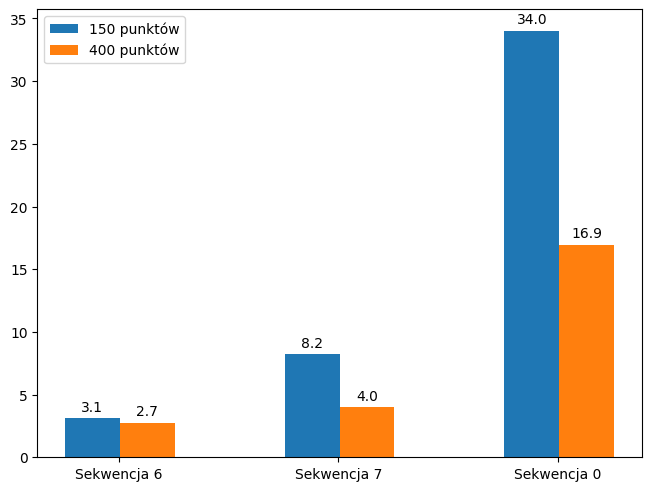

In [ ]:
sekwencja = ("Sekwencja 6", "Sekwencja 7", "Sekwencja 0")
mean_errors_gftt = {
    '150 punktów': (mean_data_gftt_6_150.loc['total mean error:', 'Value'], 
                    mean_data_gftt_7_150.loc['total mean error:', 'Value'],
                    mean_data_gftt_0_150.loc['total mean error:', 'Value']),
    '400 punktów': (mean_data_gftt_6_400.loc['total mean error:', 'Value'],
                    mean_data_gftt_7_400.loc['total mean error:', 'Value'],
                    mean_data_gftt_0_400.loc['total mean error:', 'Value'] )
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mean_errors_gftt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset+0.13, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, sekwencja)
ax.legend(loc='upper left', )
plt.savefig('../results/Mean_errors_gftt.jpg')


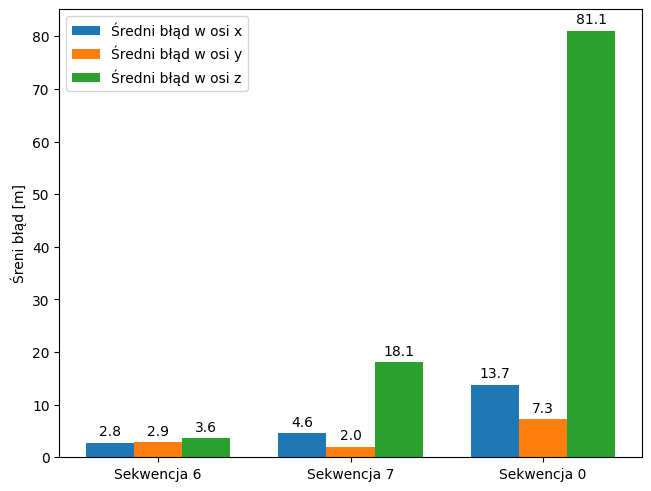

In [ ]:

sekwencja = ("Sekwencja 6", "Sekwencja 7", "Sekwencja 0")
mean_errors_gftt = {
    'Średni błąd w osi x': (mean_data_gftt_6_150.loc['mean error x:', 'Value'], mean_data_gftt_7_150.loc['mean error x:', 'Value'], mean_data_gftt_0_150.loc['mean error x:', 'Value']),
    'Średni błąd w osi y': (mean_data_gftt_6_150.loc['mean error y:', 'Value'], mean_data_gftt_7_150.loc['mean error y:', 'Value'], mean_data_gftt_0_150.loc['mean error y:', 'Value']),
    'Średni błąd w osi z': (mean_data_gftt_6_150.loc['mean error z:', 'Value'], mean_data_gftt_7_150.loc['mean error z:', 'Value'], mean_data_gftt_0_150.loc['mean error z:', 'Value']),
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

for attribute, measurement in mean_errors_gftt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Śreni błąd [m]')
ax.set_xticks(x + width, sekwencja)
ax.legend(loc='upper left')
plt.savefig('../results/Mean_error_in_xyz_gftt_150.jpg')


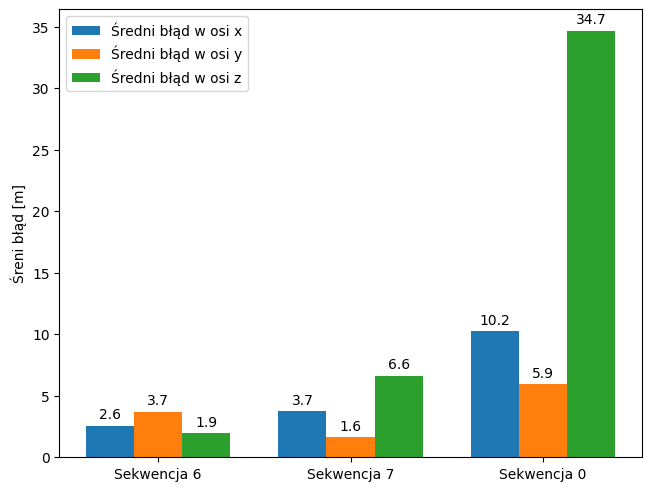

In [ ]:

sekwencja = ("Sekwencja 6", "Sekwencja 7", "Sekwencja 0")
mean_errors_gftt = {
    'Średni błąd w osi x': (mean_data_gftt_6_400.loc['mean error x:', 'Value'], mean_data_gftt_7_400.loc['mean error x:', 'Value'], mean_data_gftt_0_400.loc['mean error x:', 'Value']),
    'Średni błąd w osi y': (mean_data_gftt_6_400.loc['mean error y:', 'Value'], mean_data_gftt_7_400.loc['mean error y:', 'Value'], mean_data_gftt_0_400.loc['mean error y:', 'Value']),
    'Średni błąd w osi z': (mean_data_gftt_6_400.loc['mean error z:', 'Value'], mean_data_gftt_7_400.loc['mean error z:', 'Value'], mean_data_gftt_0_400.loc['mean error z:', 'Value']),
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

for attribute, measurement in mean_errors_gftt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Śreni błąd [m]')
ax.set_xticks(x + width, sekwencja)
ax.legend(loc='upper left')
plt.savefig('../results/Mean_errors_in_xyz_gftt_400.jpg')

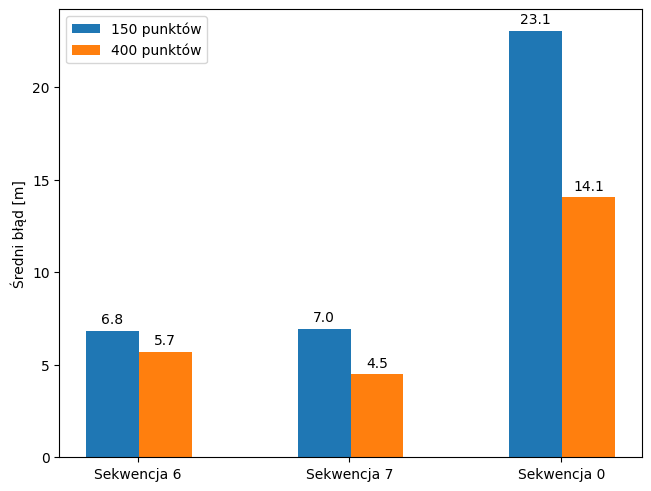

In [ ]:
sekwencja = ("Sekwencja 6", "Sekwencja 7", "Sekwencja 0")
mean_errors_gftt = {
    '150 punktów': (mean_data_orb_6_150.loc['total mean error:', 'Value'], 
                    mean_data_orb_7_150.loc['total mean error:', 'Value'],
                    mean_data_orb_0_150.loc['total mean error:', 'Value']),
    '400 punktów': (mean_data_orb_6_400.loc['total mean error:', 'Value'],
                    mean_data_orb_7_400.loc['total mean error:', 'Value'],
                    mean_data_orb_0_400.loc['total mean error:', 'Value'] )
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the barsGFTT
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mean_errors_gftt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset+0.13, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Średni błąd [m]')
ax.set_xticks(x + width, sekwencja)
ax.legend(loc='upper left')
plt.savefig('../results/Mean_errors_orb.jpg')

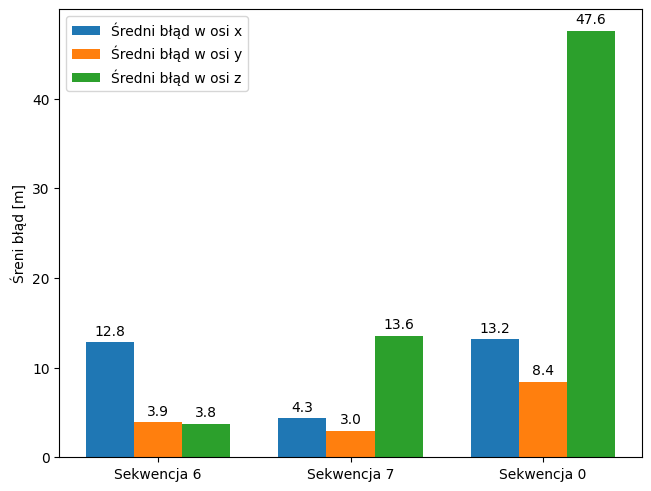

In [ ]:
sekwencja = ("Sekwencja 6", "Sekwencja 7", "Sekwencja 0")
mean_errors_orb = {
    'Średni błąd w osi x': (mean_data_orb_6_150.loc['mean error x:', 'Value'], mean_data_orb_7_150.loc['mean error x:', 'Value'], mean_data_orb_0_150.loc['mean error x:', 'Value']),
    'Średni błąd w osi y': (mean_data_orb_6_150.loc['mean error y:', 'Value'], mean_data_orb_7_150.loc['mean error y:', 'Value'], mean_data_orb_0_150.loc['mean error y:', 'Value']),
    'Średni błąd w osi z': (mean_data_orb_6_150.loc['mean error z:', 'Value'], mean_data_orb_7_150.loc['mean error z:', 'Value'], mean_data_orb_0_150.loc['mean error z:', 'Value']),
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

for attribute, measurement in mean_errors_orb.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Śreni błąd [m]')
ax.set_xticks(x + width, sekwencja)
ax.legend(loc='upper left')
plt.savefig('../results/Mean_errors_in_xyz_orb_150.jpg')

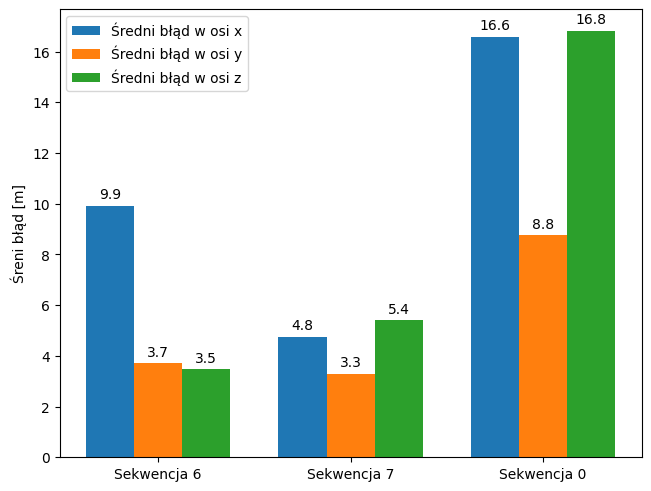

In [ ]:
sekwencja = ("Sekwencja 6", "Sekwencja 7", "Sekwencja 0")
mean_errors_orb = {
    'Średni błąd w osi x': (mean_data_orb_6_400.loc['mean error x:', 'Value'], mean_data_orb_7_400.loc['mean error x:', 'Value'], mean_data_orb_0_400.loc['mean error x:', 'Value']),
    'Średni błąd w osi y': (mean_data_orb_6_400.loc['mean error y:', 'Value'], mean_data_orb_7_400.loc['mean error y:', 'Value'], mean_data_orb_0_400.loc['mean error y:', 'Value']),
    'Średni błąd w osi z': (mean_data_orb_6_400.loc['mean error z:', 'Value'], mean_data_orb_7_400.loc['mean error z:', 'Value'], mean_data_orb_0_400.loc['mean error z:', 'Value']),
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mean_errors_orb.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Śreni błąd [m]')
ax.set_xticks(x + width, sekwencja)
ax.legend(loc='upper left')
plt.savefig('../results/Mean_errors_in_xyz_orb_400.jpg')

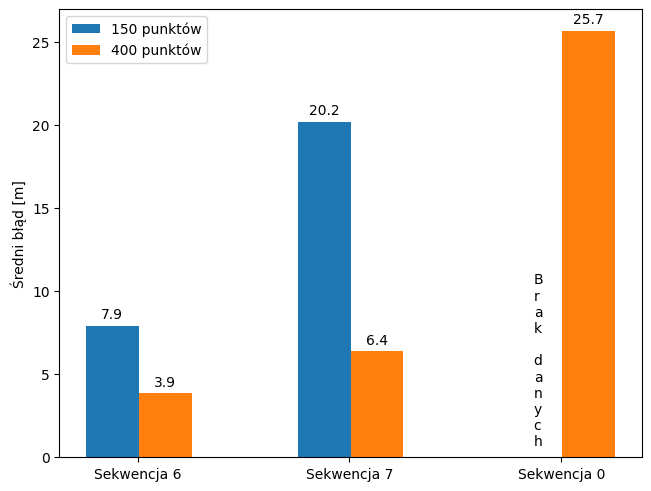

In [ ]:

sekwencja = ("Sekwencja 6", "Sekwencja 7", "Sekwencja 0")
mean_errors_gftt = {
    '150 punktów': (mean_data_sift_6_150.loc['total mean error:', 'Value'], 
                    mean_data_sift_7_150.loc['total mean error:', 'Value'],
                    float("NaN")),
    '400 punktów': (mean_data_sift_6_400.loc['total mean error:', 'Value'],
                    mean_data_sift_7_400.loc['total mean error:', 'Value'],
                    mean_data_sift_0_400.loc['total mean error:', 'Value'] )
}

x = np.arange(len(sekwencja))  # the label locations
width = 0.25  # the width of the barsGFTT
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mean_errors_gftt.items():
    offset = width * multiplier
    print()

    rects = ax.bar(x + offset+0.13, measurement, width, label=attribute)

    ax.bar_label(rects, padding=3, fmt= "%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Średni błąd [m]')
ax.text(2.12,0.7, "B\nr\na\nk\n\nd\na\nn\ny\nc\nh")
ax.set_xticks(x + width, sekwencja)
ax.legend(loc='upper left')
plt.savefig('../results/Mean_errors_sift.jpg')

In [ ]:
cdf_results = netCDF4.Dataset('../visual_slam_cpp/test_no.nc')
print(cdf_results)

print(cdf_results.variables.keys())
read_poses = cdf_results.variables['pose_matricies_T']
read_mappoints = cdf_results.variables['mappoints_set']

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): matrix_width(4), matrix_height(3), poses(117), vector_length(3), mappoints(62376)
    variables(dimensions): float32 pose_matricies_T(poses, matrix_height, matrix_width), float32 mappoints_set(mappoints, vector_length)
    groups: 
dict_keys(['pose_matricies_T', 'mappoints_set'])


Text(0.5, 1.0, 'xda')

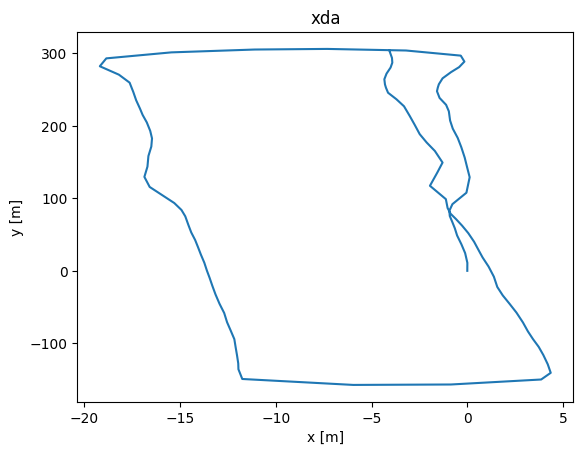

In [ ]:
plt.plot(read_poses[:,:,3][:,0], read_poses[:,:,3][:,2])
# plt.scatter(read_mappoints[:,1], read_mappoints[:,2] )
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('xda')